In [1]:
#!pip install yfinance

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

In [3]:
from datetime import datetime

start_date = datetime(2019, 1, 1)
end_date = datetime(2019, 12, 31)

In [4]:
dow_url = 'https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average'

In [5]:
data_table = pd.read_html(dow_url)[1]['Symbol']
print(data_table)

0      MMM
1      AXP
2     AMGN
3     AAPL
4       BA
5      CAT
6      CVX
7     CSCO
8       KO
9      DIS
10     DOW
11      GS
12      HD
13     HON
14     IBM
15    INTC
16     JNJ
17     JPM
18     MCD
19     MRK
20    MSFT
21     NKE
22      PG
23     CRM
24     TRV
25     UNH
26      VZ
27       V
28     WBA
29     WMT
Name: Symbol, dtype: object


In [6]:
tickers = data_table.tolist()
prices_list = []
for ticker in tickers:
    try:
        prices = yf.download(ticker,start_date,end_date)['Adj Close']
        prices = pd.DataFrame(prices)
        prices.columns = [ticker]
        prices_list.append(prices)
    except:
        pass
    prices_df = pd.concat(prices_list,axis=1)
prices_df.sort_index(inplace=True)
prices_df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DIS,...,MSFT,NKE,PG,CRM,TRV,UNH,VZ,V,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,170.595627,90.745201,176.810379,38.177799,313.372223,116.373871,93.032425,39.079334,42.694016,108.326126,...,98.014893,71.963913,84.180611,136.970001,110.819557,236.967743,48.259975,129.290939,60.495598,87.736633
2019-01-02,170.962723,91.087929,174.294495,38.221371,314.645142,115.741951,94.657227,38.736614,42.315327,107.654335,...,97.580650,71.886261,83.594482,135.550003,108.617043,231.612366,48.088284,130.251221,60.238842,87.915581
2019-01-03,164.525330,89.309952,171.642380,34.414242,302.100525,111.281898,92.844292,37.327839,42.053844,105.046211,...,93.990852,70.614708,83.008369,130.399994,106.664398,225.296326,48.259975,125.557426,59.610249,87.463486
2019-01-04,171.294006,93.334305,177.509705,35.883354,317.822571,117.362968,94.768387,39.009277,42.892387,108.286606,...,98.362320,72.458946,84.702599,137.960007,109.829346,227.931183,48.380146,130.966599,61.593422,88.009773
2019-01-07,170.900070,93.840919,179.898468,35.803486,318.823425,117.436241,95.999809,39.272846,42.333351,109.225136,...,98.487740,73.497543,84.363770,142.220001,109.477692,228.368713,48.689182,133.328186,61.947567,89.045822


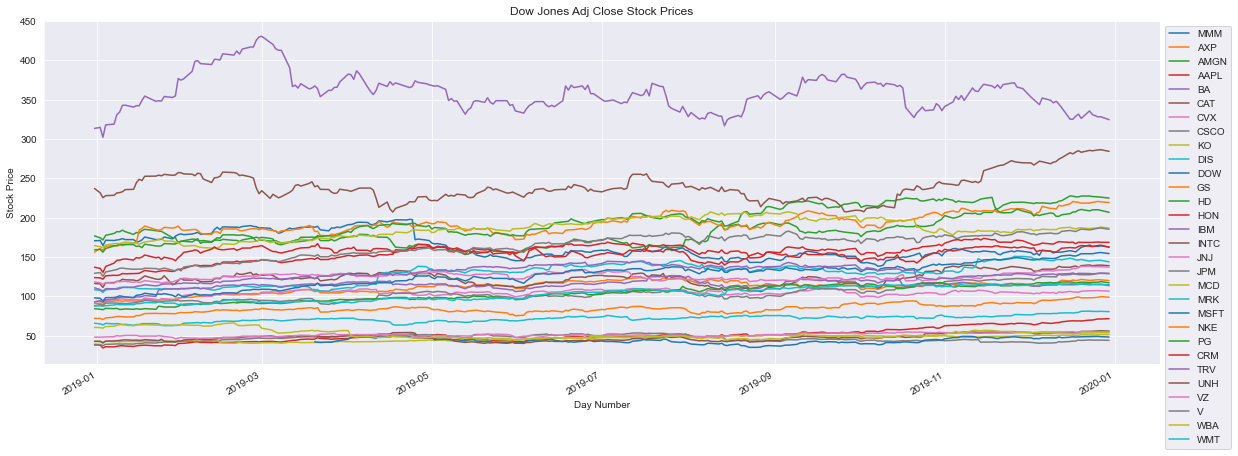

In [7]:
prices_df.plot(figsize=(20,7))
plt.xlabel('Day Number')
plt.ylabel('Stock Price')
plt.title('Dow Jones Adj Close Stock Prices')
plt.legend(bbox_to_anchor=[1,1]);

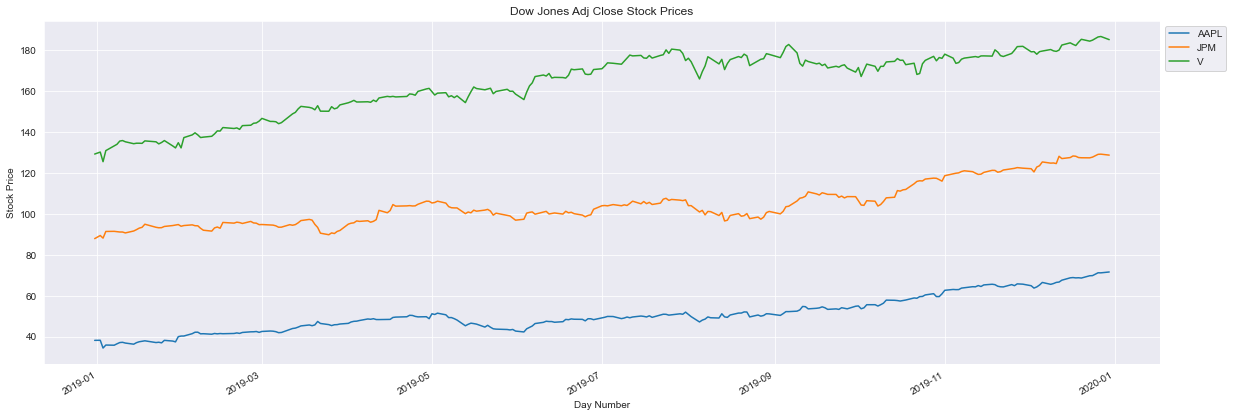

In [8]:
prices_df[['AAPL','JPM','V']].plot(figsize=(20,7))
plt.xlabel('Day Number')
plt.ylabel('Stock Price')
plt.title('Dow Jones Adj Close Stock Prices')
plt.legend(bbox_to_anchor=[1,1]);

In [9]:
prices_df[['AAPL','JPM','V']].to_csv('3Stocks.csv')

In [10]:
Stock_returns=prices_df.pct_change()[1:]
Stock_returns

,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DIS,...,MSFT,NKE,PG,CRM,TRV,UNH,VZ,V,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,0.002152,0.003777,-0.014229,0.001141,0.004062,-0.005430,0.017465,-0.008770,-0.008870,-0.006202,...,-0.004430,-0.001079,-0.006963,-0.010367,-0.019875,-0.022600,-0.003558,0.007427,-0.004244,0.002040
2019-01-03,-0.037654,-0.019519,-0.015216,-0.099607,-0.039869,-0.038534,-0.019153,-0.036368,-0.006179,-0.024227,...,-0.036788,-0.017688,-0.007011,-0.037993,-0.017977,-0.027270,0.003570,-0.036036,-0.010435,-0.005142
2019-01-04,0.041141,0.045061,0.034183,0.042689,0.052042,0.054646,0.020724,0.045045,0.019940,0.030847,...,0.046510,0.026117,0.020410,0.057976,0.029672,0.011695,0.002490,0.043081,0.033269,0.006246
2019-01-07,-0.002300,0.005428,0.013457,-0.002226,0.003149,0.000624,0.012994,0.006757,-0.013033,0.008667,...,0.001275,0.014334,-0.004000,0.030878,-0.003202,0.001920,0.006388,0.018032,0.005750,0.011772
2019-01-08,0.004191,0.004889,0.012824,0.019063,0.037853,0.012010,-0.004365,0.008100,0.011289,0.007779,...,0.007251,0.013338,0.003691,0.024610,-0.003889,0.013371,0.029267,0.005439,0.020008,0.006981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,0.017677,-0.010177,-0.000123,0.016318,0.029116,0.006302,0.005431,0.013699,-0.001092,-0.014978,...,0.000000,0.000800,-0.003669,-0.004923,-0.001466,0.008544,-0.010794,-0.004894,0.003083,-0.010475
2019-12-24,-0.010030,0.002008,-0.002880,0.000951,-0.013480,-0.006869,0.000083,-0.006653,-0.003642,0.004216,...,-0.000191,0.001000,0.002562,-0.002993,-0.002936,-0.001864,-0.001954,0.002619,-0.003756,0.004033
2019-12-26,-0.000509,0.005371,-0.001774,0.019841,-0.009249,0.005018,0.002161,0.001465,0.005666,0.002822,...,0.008196,0.005692,0.000000,0.007718,0.003387,0.003768,0.000163,0.008477,0.009426,0.000084


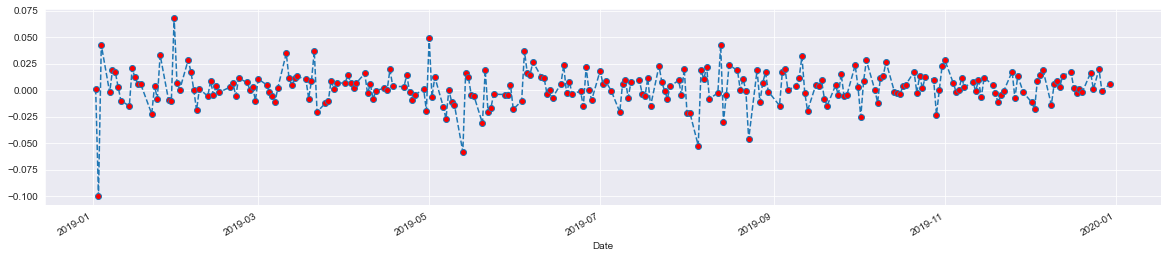

In [11]:
Stock_returns['AAPL'].plot(figsize=(20,4), linestyle='--', marker='o', markerfacecolor='red',
                         markersize=6);